# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: Sarah Jones

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

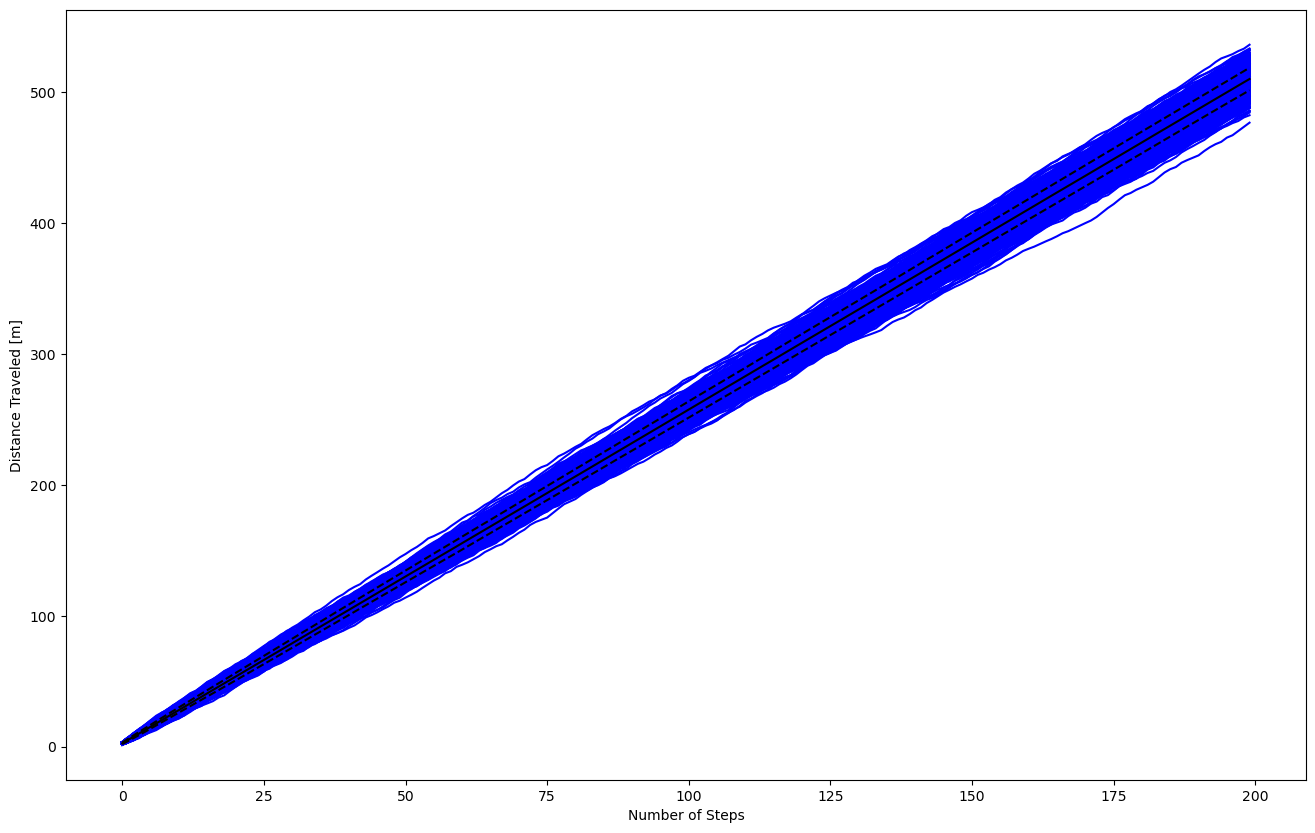

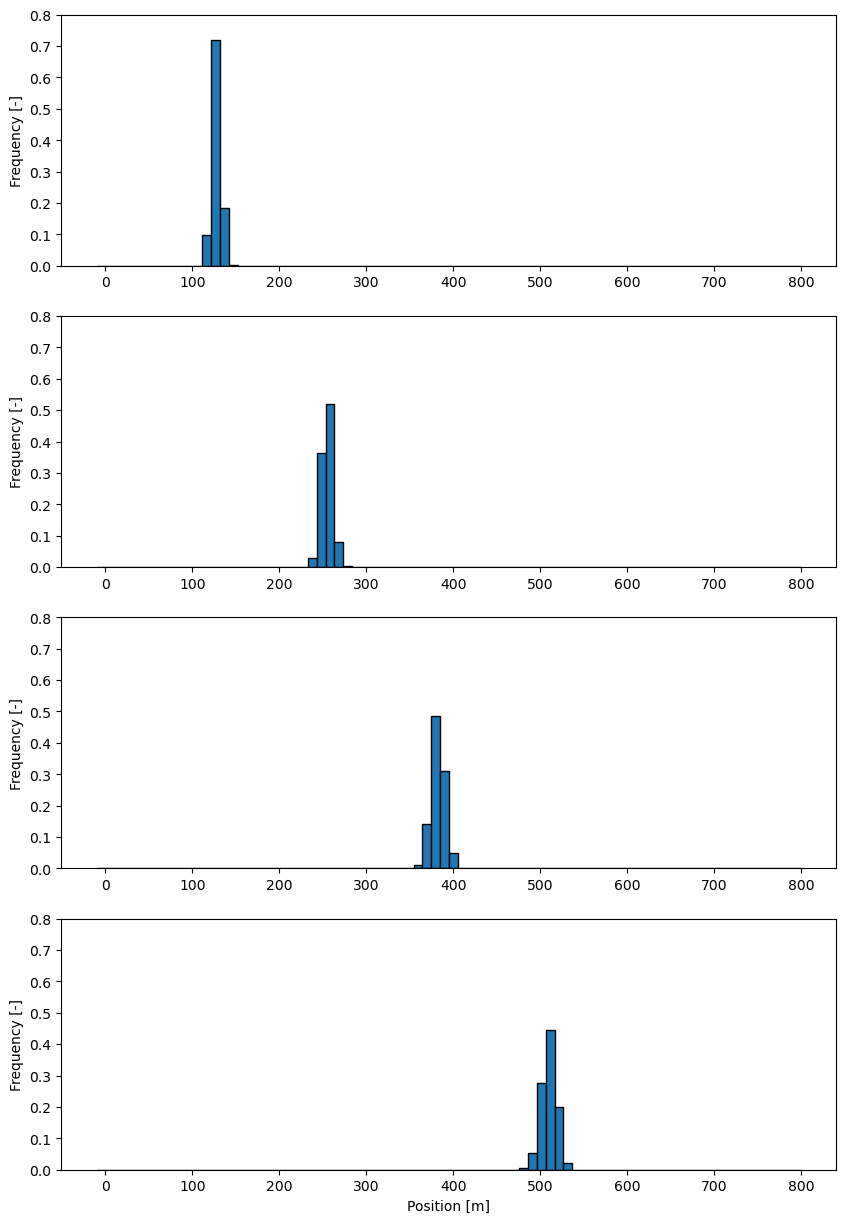

In [1]:
import numpy as np  #used to create arrays, random numbers, and other mathematical operations
import matplotlib.pyplot as plt   # needed for plotting operations

Nt = 200    # Number of time steps
Nx = 1000   # Number of walkers

mu_x = 1.5     # Average step size in random walk
s_x = 2.1      # Standard deviation of step size in walk
min_x = 1.25   # Minimum step size at each stage in the random walk

# Create container that stores position of random walkers at each time step. 
# Corresponds to an array of zeros that is Nt x Nx.

x = np.zeros((Nt,Nx))   # Initializes x; x represents position of walker along x-axis

# Use for loop to generate and assign values for walkers and time steps. Nested loop allows all the 
# walker data to be added to the x array for each time step, adding values to the array for each column
# in the row before moving to the next row.

for i in np.arange(Nt):      # Loop for time steps
    for j in np.arange(Nx):   # Loop for walkers
        
        x_i = 1
        
        # Use while loop to keep generating random step size until it exceeds the minimum step size criteria
        while (x_i < min_x):
            x_i = s_x*np.random.rand() + mu_x   # Creates random number with mean = 0, standard deviation = 1 which we use for random step size
            
        if(i==0):
            x[i,j] = 0.0 + x_i   # Assigns first random step to first position or "row" in x (loop repeats operation for each column in row); initial position of walker is 0
    
        else:
            x[i,j] = x[i-1,j] + x_i   # Adds new position to x array for rows > 0; new position is last position + random step

            
# Calculate average distance of all walkers and standard deviation of all walkers through time

mean_x = np.mean(x,axis=1)   # Mean distance traveled by all walkers
std_x = np.std(x,axis=1)     # Standard deviation of all walkers


# Create plot of number of steps vs distance traveled, aka, reproduce figure in 5.1 of the example notebook

plt.figure(figsize = (16,10))

plt.plot(np.arange(Nt),x,'b-')   # Plots the position of each walker along the x axis at each time step
plt.plot(np.arange(Nt),mean_x,'k-')   # Plots mean distance traveled by all walkers
plt.plot(np.arange(Nt),mean_x + std_x, 'k--')   # Plots upper bound of confidence interval
plt.plot(np.arange(Nt),mean_x - std_x, 'k--')   # Plots lower bound of confidence interval
plt.xlabel('Number of Steps')
plt.ylabel('Distance Traveled [m]')

# Create histogram, aka reproduce figure in 5.2 of example notebook
# Histogram shows the frequency with which walkers reached positions within certain ranges of time steps.
# Ranges of time steps are broken up as follows: 0-49, 50-99, 100-150, 150-200

x_50, be_50 = np.histogram(x[49,:], bins=80, range=(-10.0,800))
x_100, be_100 = np.histogram(x[99,:], bins=80, range=(-10.0,800))
x_150, be_150 = np.histogram(x[149,:], bins=80, range=(-10.0,800))
x_200, be_200 = np.histogram(x[-1,:], bins=80, range=(-10.0,800))

plt.figure(figsize = (10,15))
plt.subplot(4,1,1)
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width =(be_50[1]-be_50[0]), edgecolor= 'black')
plt.ylim((0.0,0.8))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]), edgecolor= 'black')
plt.ylim((0.0,0.8))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]), edgecolor='black')
plt.ylim((0.0,0.8))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_150)), width=(be_200[1]-be_200[0]), edgecolor='black')
plt.ylim((0.0,0.8))
plt.ylabel('Frequency [-]')
plt.xlabel('Position [m]')

plt.show()

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

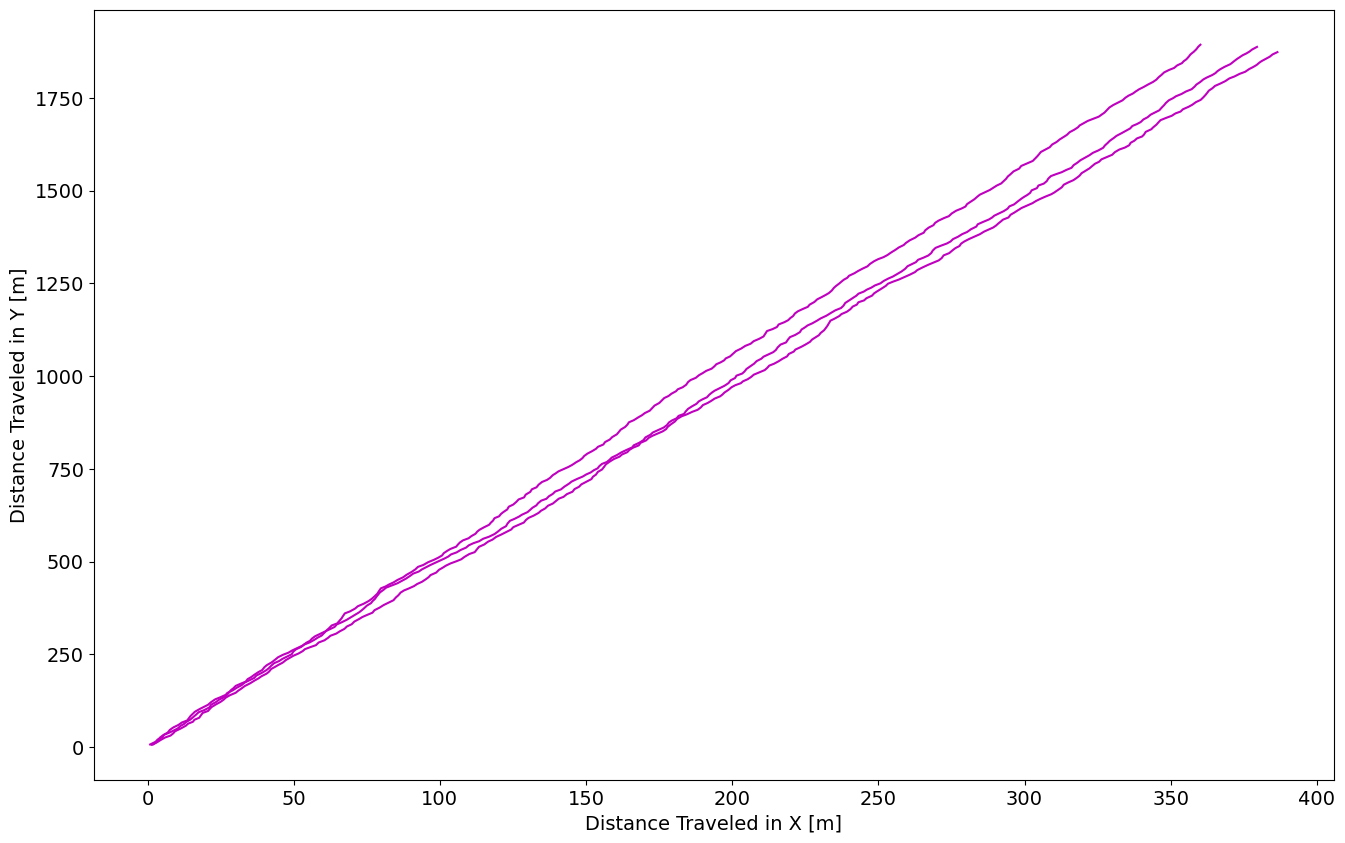

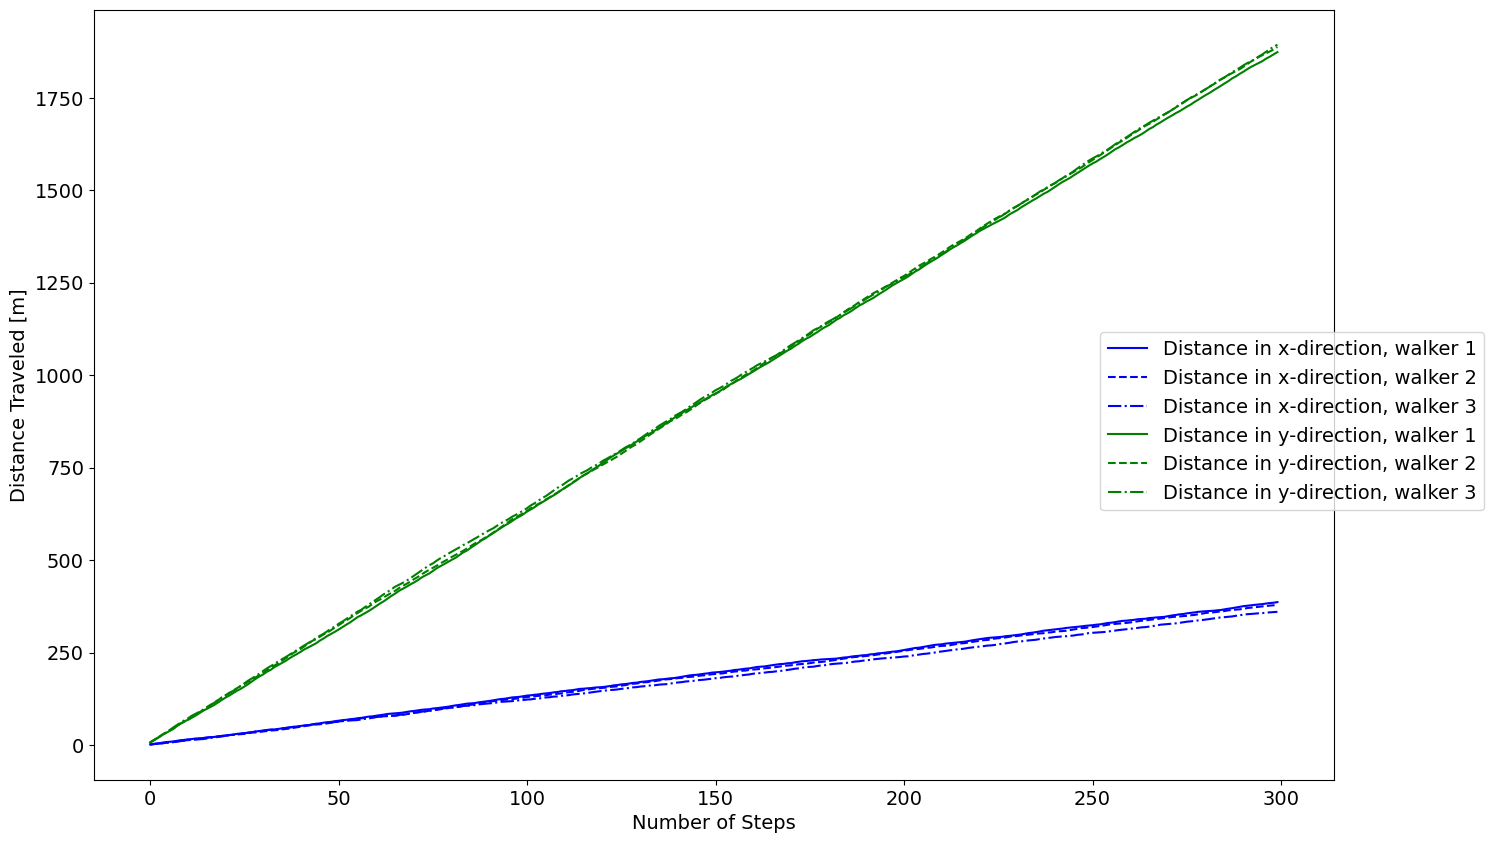

In [14]:
import numpy as np  # Used to create arrays, random numbers, and other mathematical operations
import matplotlib.pyplot as plt   # Needed for plotting operations

NT = 300   # Number of time steps
NX = 3     # Number of walkers
 
mu_X = 0.5   # Average step size in x direction
s_X = 1.5    # Standard deviation of step size in x direction

mu_Y = 5.0   # Average step size in y direction
s_Y = 2.5    # Standard deviation of step size in y direction


X = np.zeros((NT,NX))   # Initializes x; x represents position of walker along x-axis
Y = np.zeros((NT,NX))   # Initializes y; y represents position of walker along y-axis

# Use for loop to generate and assign values for walkers and time steps. Nested loop allows all the 
# walker data to be added to the x and y arrays for each time step, adding values to the array for each column
# in the row before moving to the next row.

# X-direction
for i in np.arange(NT):      # Loop for time steps
    for j in np.arange(NX):   # Loop for walkers
        
        X_i = s_X*np.random.rand() + mu_X   # Creates random number with mean = 0, standard deviation = 1 which we use for random step size in x-direction
       
        if(i==0):
            X[i,j] = 0.0 + X_i   # Assigns first random step to first position or "row" in x (loop repeats operation for each column in row); initial position of walker is 0
           
        else:
            X[i,j] = X[i-1,j] + X_i   # Adds new position to x array for rows > 0; new position is last position + random step
           
            
# Y-direction
for i in np.arange(NT):      # Loop for time steps
    for j in np.arange(NX):   # Loop for walkers
        
        Y_i = s_Y*np.random.rand() + mu_Y   # Creates random number with mean = 0, standard deviation = 1 which we use for random step size in y-direction
        
        if(i==0):
            Y[i,j] = 0.0 + Y_i   # Assigns first random step to first position or "row" in y (loop repeats operation for each column in row); initial position of walker is 0
    
        else:
            Y[i,j] = Y[i-1,j] + Y_i   # Adds new position to y array for rows > 0; new position is last position + random step 

# Plot y vs x

plt.rcParams.update({'font.size': 14}) # Sets all font size for figures to 14

fig = plt.figure(figsize = (16,10))
plt.plot(X,Y, 'm-')
plt.ylabel('Distance Traveled in Y [m]')
plt.xlabel('Distance Traveled in X [m]')


# Plot steps vs x and steps vs y on same plot for all walkers
fig2 = plt.figure(figsize = (16,10))

Xw1= plt.plot(np.arange(NT), X[:,0], label='Distance in x-direction, walker 1', linestyle='-', color='b')   # Plot steps taken in the x-direction by walker 1
Xw2= plt.plot(np.arange(NT), X[:,1], label='Distance in x-direction, walker 2', linestyle='--', color='b')  # Plot steps taken in the x-direction by walker 2
Xw3= plt.plot(np.arange(NT), X[:,2], label='Distance in x-direction, walker 3', linestyle='-.', color='b')  # Plot steps taken in the x-direction by walker 3
Yw1= plt.plot(np.arange(NT), Y[:,0], label='Distance in y-direction, walker 1', linestyle='-', color='g')   # Plot steps taken in the y-direction by walker 1
Yw2= plt.plot(np.arange(NT), Y[:,1], label='Distance in y-direction, walker 2', linestyle='--', color='g')  # Plot steps taken in the y-direction by walker 2
Yw3= plt.plot(np.arange(NT), Y[:,2], label='Distance in y-direction, walker 3', linestyle='-.', color='g')  # Plot steps taken in the y-direction by walker 3

plt.xlabel('Number of Steps')
plt.ylabel('Distance Traveled [m]')
fig2.legend(loc='center right')  


plt.show()